# [RecipeBox](https://eightportions.com/datasets/Recipes/)

Analysis of dataset should contain: 
* [Plantuml](https://plantuml.com/de/json) diagram of json structure 
* Amount of recipes
* Plots:
 * Num of Instructions
 * Num of Ingredients
 * Most used words in Instructions
 * Most used words in Ingedients
 * (Optional) Kind of dish


In [1]:
# Import python librarys
import json
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data of recipe box
file_ar = open('.recipeBox/recipes_raw_nosource_ar.json')
data_ar = json.load(file_ar)

file_epi = open('.recipeBox/recipes_raw_nosource_epi.json')
data_epi = json.load(file_epi)

file_fn = open('.recipeBox/recipes_raw_nosource_fn.json')
data_fn = json.load(file_fn)

# Join dicts of different websites scraped in recipe box
data = {**data_ar, **data_epi, **data_fn}

In [3]:
# Strip empty entries
data_stripped = {k: v for k, v in data.items() if v}

In [4]:
# Analysis
## Length of the dataset
print('Amount of recipes: ' + str(len(data_stripped)))

# Total amount of ingredients and instructions
sumInstructions = 0
sumIngredients = 0
for value in data_stripped.values():
    sumIngredients = sumIngredients + len(value['ingredients'])
    if value['instructions']:
        sumInstructions = sumInstructions + len(value['instructions'].split("."))

print('Amount of Ingredients: ' + str(sumIngredients))
print('Amount of Instructions: ' + str(sumInstructions))

Amount of recipes: 124647
Amount of Ingredients: 1316950
Amount of Instructions: 1924048


In [17]:
# Unit strings
units = list(
    ['ounce', 'teaspoon', 'tablespoon', 'cup', 'can']
)

unitString = ''
for string in units:
    if unitString != '':
        unitString = unitString + '|'
    unitString = unitString + string

print(unitString)

ounce|teaspoon|tablespoon|cup|can


In [21]:
# Occurence of different ingredients 
ingredientsDict = {}

for value in data_stripped.values():
    for ingredient in value['ingredients']:
        charsToRemove = ",*®©™()"
        ingredientStripped = re.sub("[" + charsToRemove + "]", "", ingredient.lower()).replace('[', '').replace(']','').replace('advertisement', '')
        #print(ingredientStripped)
        regex = r"([0-9|\.]*)\s(" + unitString + ")*(?:s\s)*([a-z|\s]*)"
        # ([0-9|\.]*)|(\s(teaspoon|ounce)*)|([a-z|\s]*)
        #print(regex)
        matchs = re.findall(regex, ingredientStripped)
        #print(matchs)
        items = []
        for match in matchs:
            for item in match:
                items.append(item)
        for word in items:
            if word:
                word = word.strip()
                ingredientsDict[word] = ingredientsDict.setdefault(word, 0) + 1


In [22]:
# Sort the occurences of the ingredients in descending order
print(len(ingredientsDict))
sortedIngredientsDict = sorted(ingredientsDict.items(), key=lambda x:x[1], reverse=True)

# Strip ingredients with only one occurence
sortedIngredientsDictStripped = {k: v for k, v in sortedIngredientsDict if v > 1}
print(len(sortedIngredientsDictStripped))

260329
66450


In [23]:
ingr = sortedIngredientsDictStripped.keys()
value = sortedIngredientsDictStripped.values()

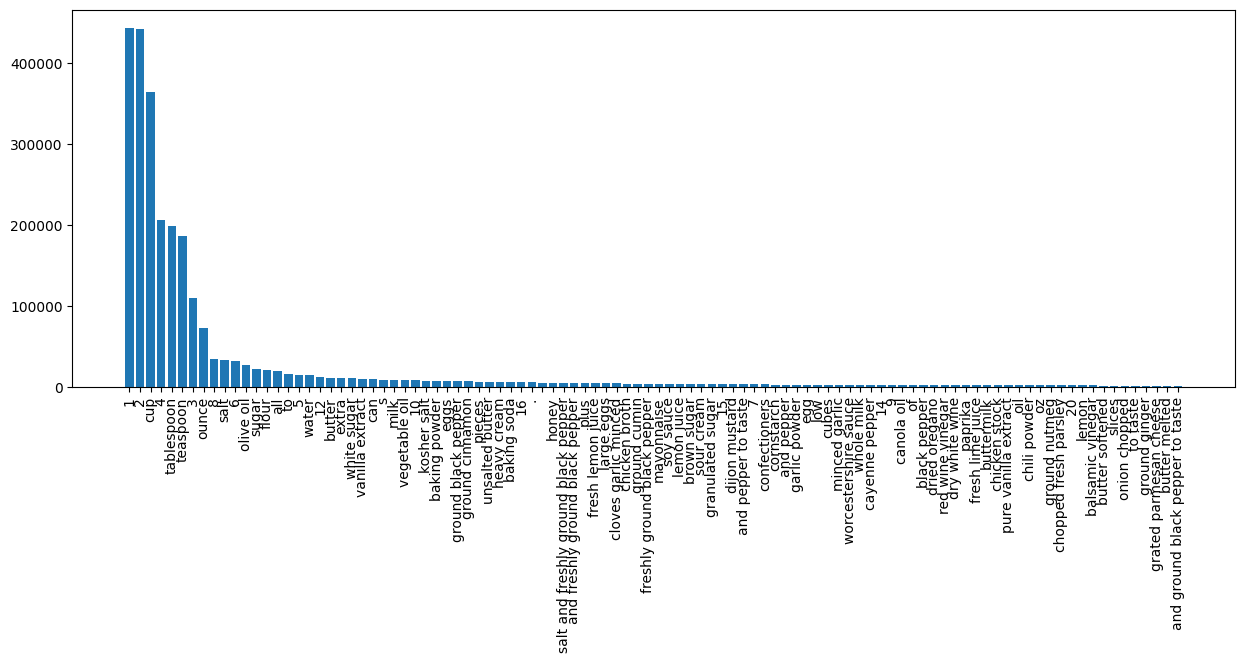

In [24]:
# Plot first 100 of the most occuring ingredients
ingrStripped = list(ingr)[:100]
valueStripped = list(value)[:100]
plt.figure(figsize=(15,5), dpi=100)
plt.bar(ingrStripped, valueStripped, align='center')
plt.xticks(rotation='vertical')
plt.show()